***<h1>Regression</h1>***

In [63]:
# Importing Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 

# Model Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_predict, cross_val_score, validation_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

# Preprocessing
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import learning_curve, ShuffleSplit

# Models
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

from warnings import filterwarnings 
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm



df = pd.read_csv('../CA1/housing_dataset.csv')

***<h1>Data Analysis</h1>***

| Metric             | Description                                                   | Equation                                                  |
|--------------------|---------------------------------------------------------------|-----------------------------------------------------------|
| Mean Absolute Error (MAE)  | Average absolute difference between predicted and actual values | MAE = (1 / n) * ∑(|y_true - y_pred|)                          |
| Mean Squared Error (MSE)   | Average squared difference between predicted and actual values  | MSE = (1 / n) * ∑((y_true - y_pred)^2)                        |
| Root Mean Squared Error (RMSE) | Square root of the average squared difference               | RMSE = √(MSE)                                             |
| R-squared          | Proportion of the variance in the dependent variable explained by the independent variables | R^2 = 1 - (SSR / SST)   

In [3]:
df

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000
...,...,...,...,...,...,...,...,...
540,540,Seattle,300.0,2,1,1,unfurnished,182000
541,541,New York,240.0,3,1,1,semi-furnished,176715
542,542,Boston,362.0,2,1,1,unfurnished,175000
543,543,Seattle,291.0,3,1,1,furnished,175000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   City               545 non-null    object 
 2   House Area (sqm)   545 non-null    float64
 3   No. of Bedrooms    545 non-null    int64  
 4   No. of Toilets     545 non-null    int64  
 5   Stories            545 non-null    int64  
 6   Renovation Status  545 non-null    object 
 7   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.2+ KB


In [56]:
df = df.drop('House ID', axis=1)


<h3>Univariate Analysis</h3>

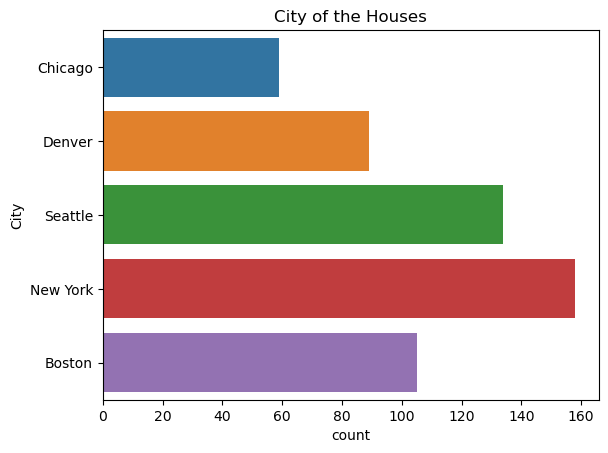

In [46]:
# change the color
sns.countplot(y = df['City'])
plt.title('City of the Houses')
plt.show()

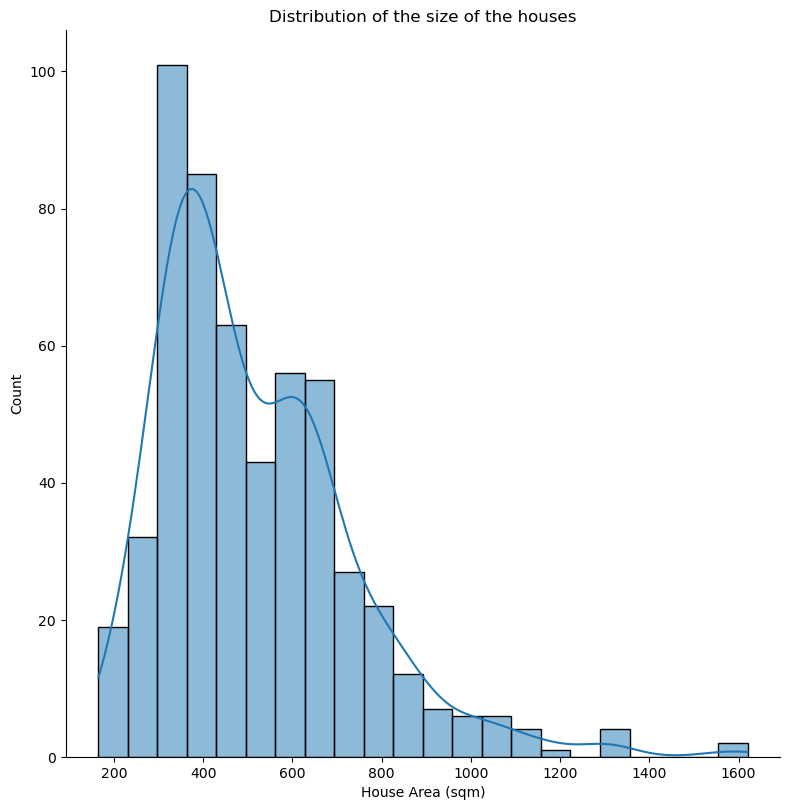

In [6]:
sns.displot(x='House Area (sqm)', kde=True, height=8, data=df)
plt.title('Distribution of the size of the houses')
plt.show()


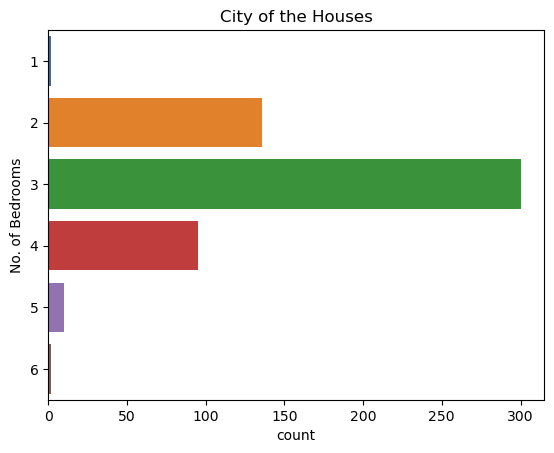

In [7]:
# change the color
sns.countplot(y = df['No. of Bedrooms'])
plt.title('City of the Houses')
plt.show()

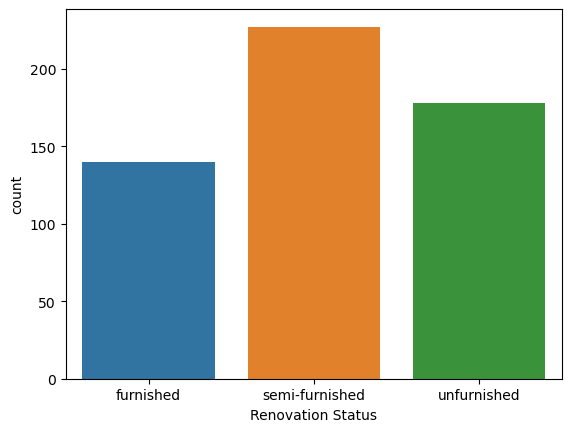

In [8]:
# change the color
sns.countplot(x = 'Renovation Status', data = df)
plt.show()

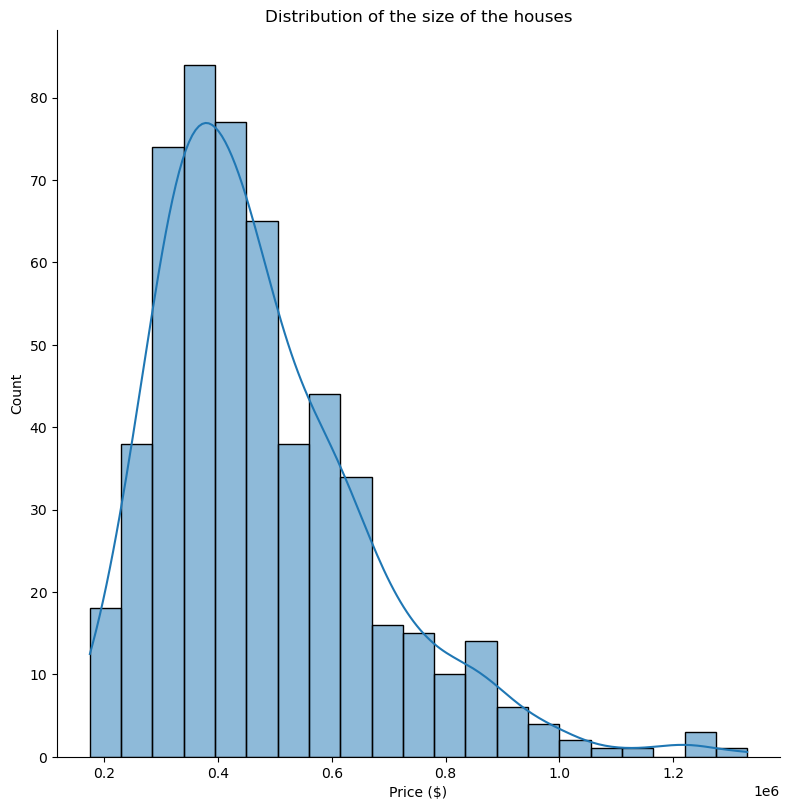

In [9]:
sns.displot(x='Price ($)', kde=True, height=8, data=df)
plt.title('Distribution of the size of the houses')
plt.show()

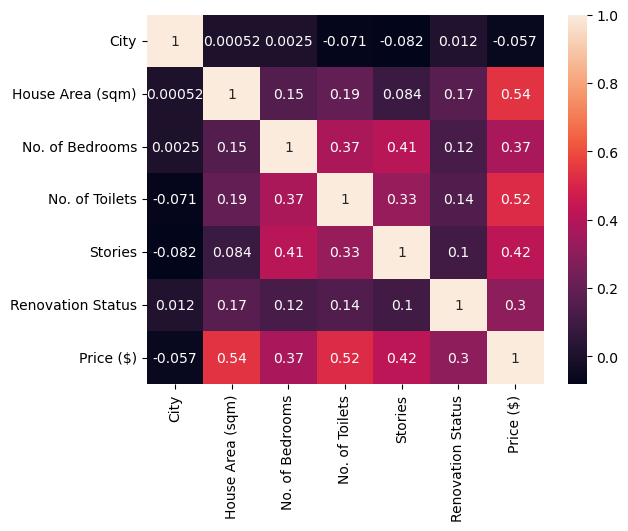

In [57]:
corr = df.corr()

sns.heatmap(corr, annot=True)   
plt.show()

<h3>Bivariate Analysis</h3>

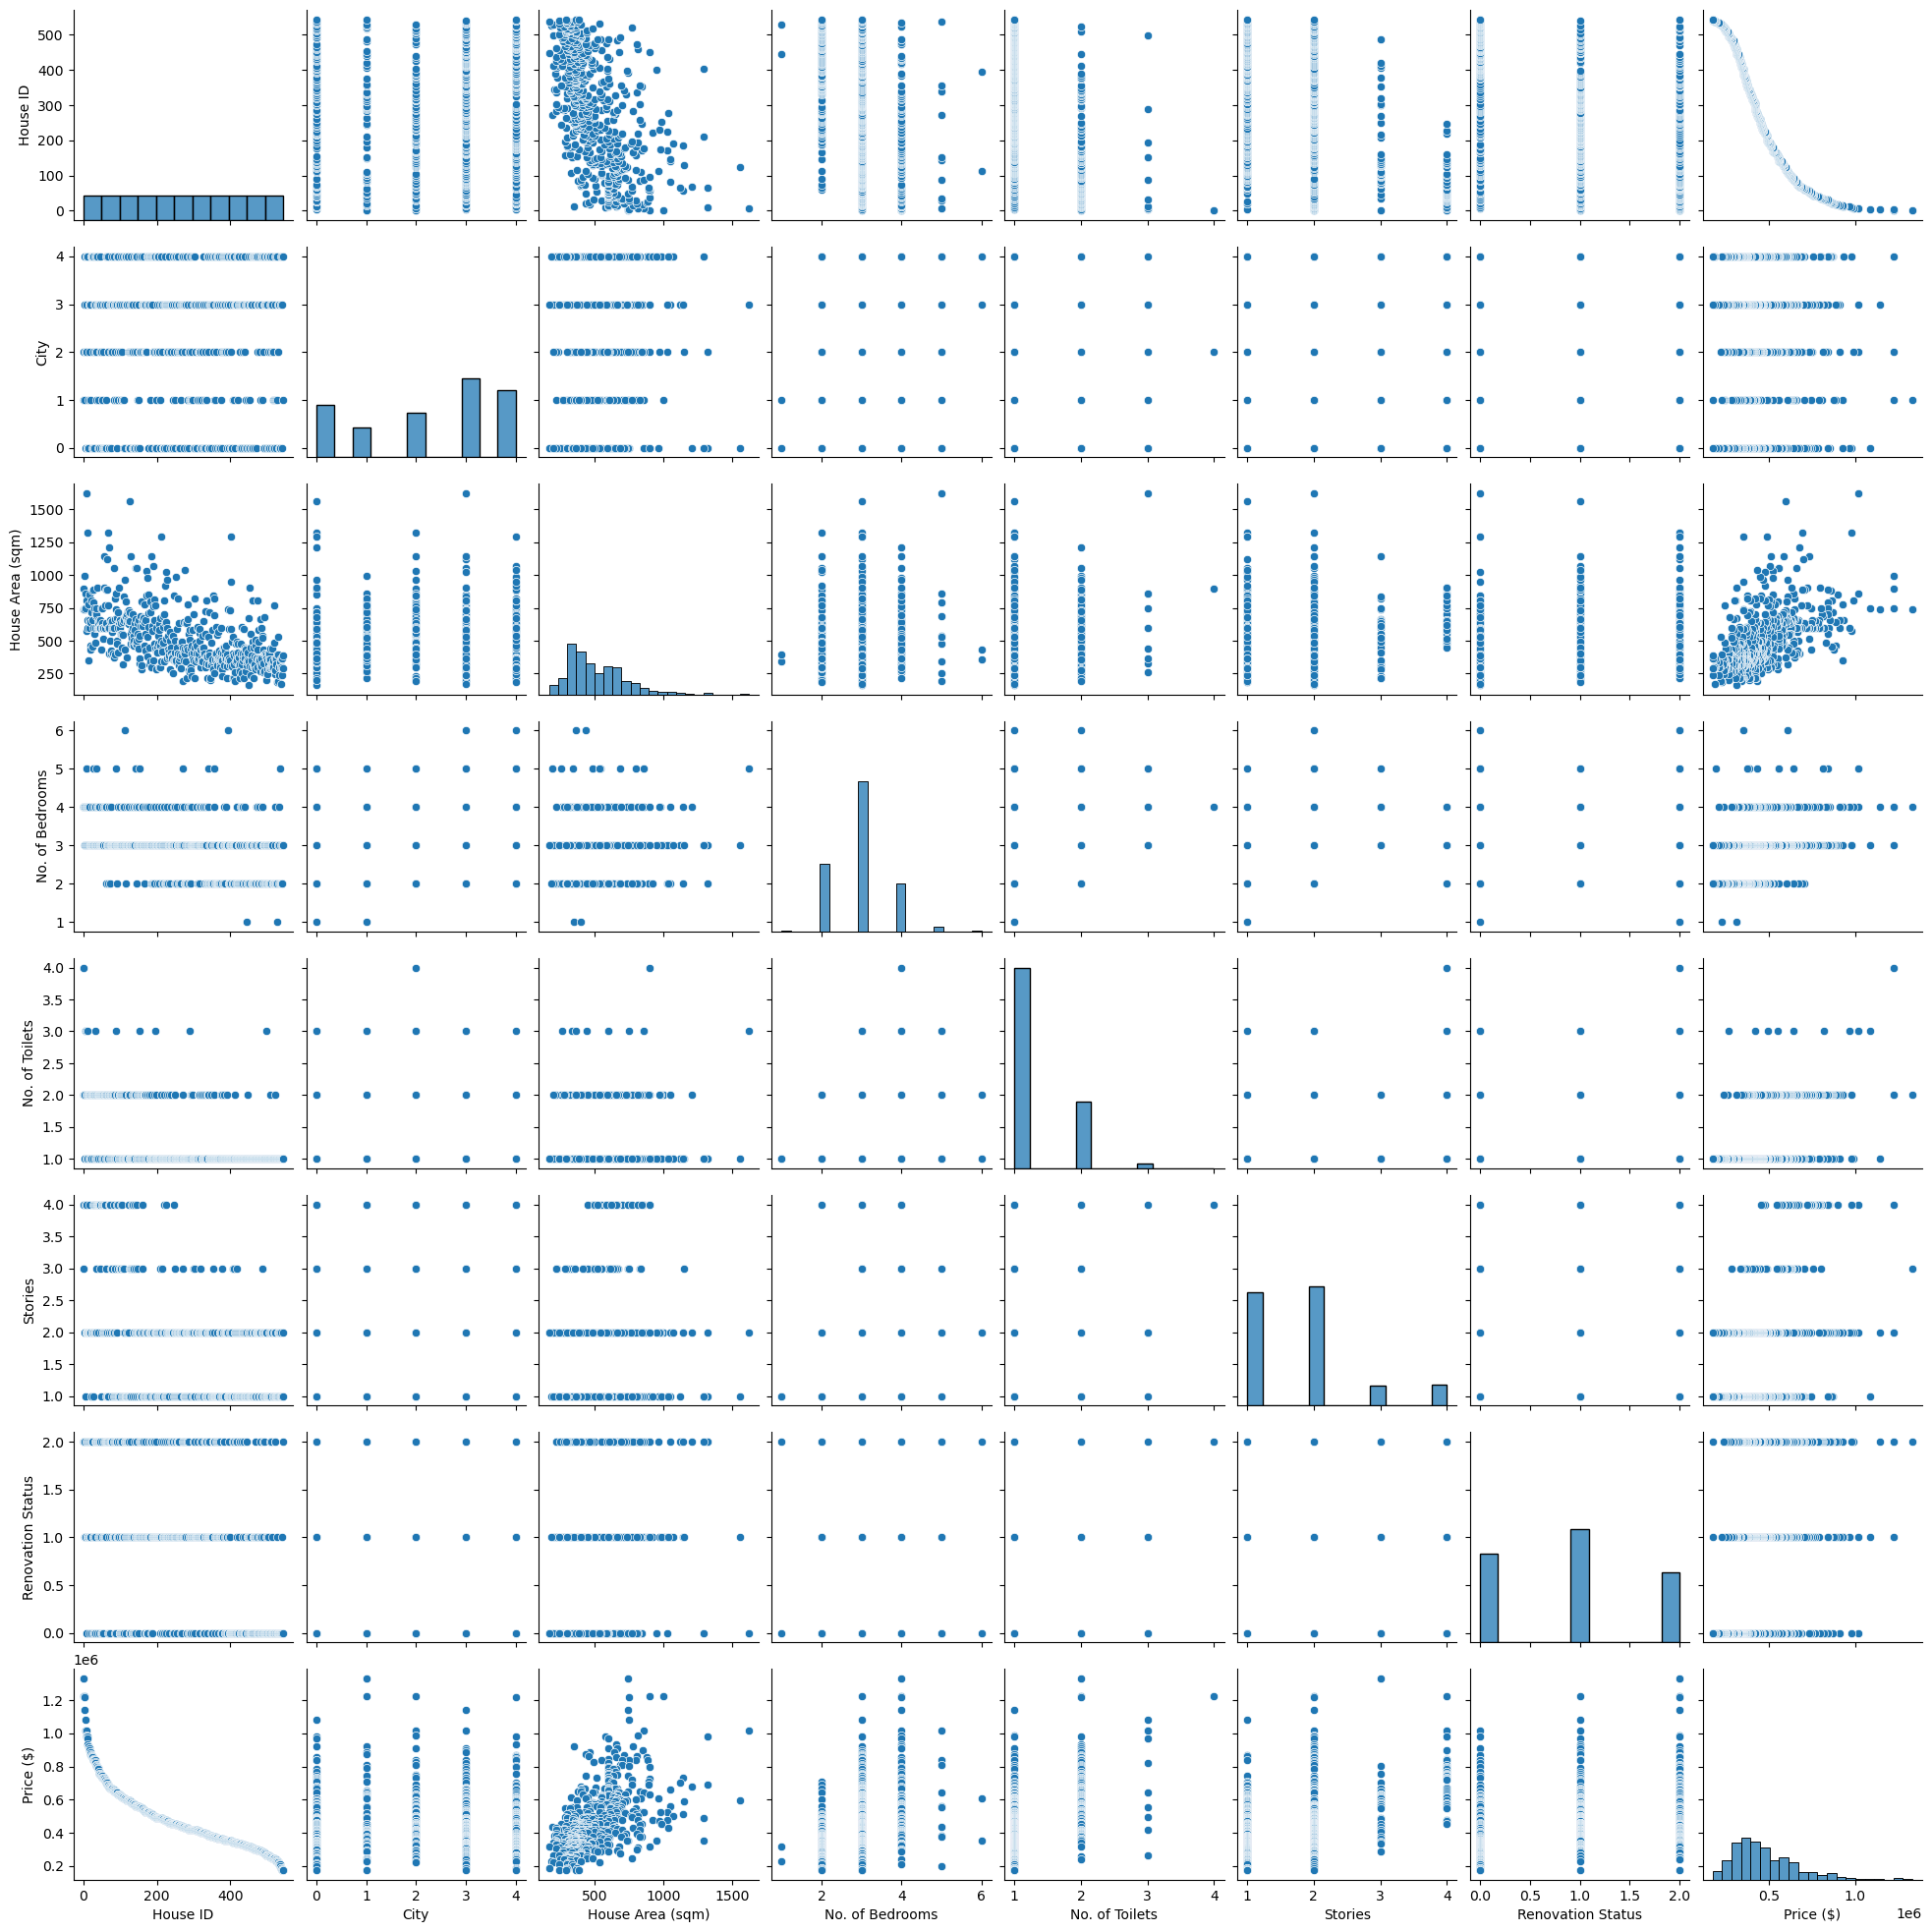

In [18]:
sns.pairplot(data = df)
plt.show()

In [12]:
df

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000
...,...,...,...,...,...,...,...,...
540,540,Seattle,300.0,2,1,1,unfurnished,182000
541,541,New York,240.0,3,1,1,semi-furnished,176715
542,542,Boston,362.0,2,1,1,unfurnished,175000
543,543,Seattle,291.0,3,1,1,furnished,175000


<h1>Data preprocessing</h1>

<h3>Encoding</h3>

In [51]:
df = pd.read_csv('../CA1/housing_dataset.csv')
print("values and its Encoded counterpart")
print()
# Using Ordinal Encoder to encode the Renovation Status column since the renvation status is ordinal
renovation_status = df['Renovation Status'].values.reshape(-1, 1)

encoder = OrdinalEncoder(categories=[['unfurnished', 'semi-furnished', 'furnished']])
encoded_renovation_status = encoder.fit_transform(renovation_status)
df['Renovation Status'] = encoded_renovation_status.flatten()
# df.drop('Renovation Status Encoded', axis=1, inplace=True)
df

# check if the value and encoded thing is the right order
original_values = encoder.inverse_transform(encoded_renovation_status)
unique_original_values = pd.unique(original_values.flatten())

# Create a dictionary to map the unique original values to their encoded values
mapping = {value: index for index, value in enumerate(unique_original_values[::-1])}

# Create a DataFrame to display the unique original values and their corresponding encoded values
for value in unique_original_values:
    encoded_value = format(mapping[value], ".1f")
    print(f"{value} - {encoded_value}")


print()

unique_values = df['City'].unique()
# print(unique_values)

# use label encoder to encode the cities in the dataframe since there are only 5 cities
encoder = LabelEncoder()
categorical_column = 'City'
unique_values = df[categorical_column].unique()

df[categorical_column] = encoder.fit_transform(df[categorical_column])
category = encoder.classes_
codes = encoder.transform(category)

for i, category in enumerate(category):
    print(f"{category} - {codes[i]}")


values and its Encoded counterpart

furnished - 2.0
semi-furnished - 1.0
unfurnished - 0.0

Boston - 0
Chicago - 1
Denver - 2
New York - 3
Seattle - 4


<h3>Feature Engineering</h3>
i decided to drop the House ID column as it is not relevant to the model

In [48]:
df = df.drop('House ID', axis=1)

df

,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,1,742.0,4,2,3,2.0,1330000
1,2,896.0,4,4,4,2.0,1225000
2,1,996.0,3,2,2,1.0,1225000
3,4,750.0,4,2,2,2.0,1221500
4,3,742.0,4,1,2,2.0,1141000
...,...,...,...,...,...,...,...
540,4,300.0,2,1,1,0.0,182000
541,3,240.0,3,1,1,1.0,176715
542,0,362.0,2,1,1,0.0,175000
543,4,291.0,3,1,1,2.0,175000


In [33]:
def convert_columns_to_int(df, columns):
    for column in columns:
        df[column] = df[column].astype(int)
    
# df['city'] = df['Column1'].astype(int)

columns_to_convert = ['City', 'Renovation Status']
convert_columns_to_int(df, columns_to_convert)

numeric_columns = df.select_dtypes(include='number').columns

# Count the number of numeric values in each column
numeric_value_counts = df[numeric_columns].count()


print(numeric_value_counts)
df.info()


City                 545
House Area (sqm)     545
No. of Bedrooms      545
No. of Toilets       545
Stories              545
Renovation Status    545
Price ($)            545
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               545 non-null    int32  
 1   House Area (sqm)   545 non-null    float64
 2   No. of Bedrooms    545 non-null    int64  
 3   No. of Toilets     545 non-null    int64  
 4   Stories            545 non-null    int64  
 5   Renovation Status  545 non-null    int32  
 6   Price ($)          545 non-null    int64  
dtypes: float64(1), int32(2), int64(4)
memory usage: 25.7 KB


*<h3>Standardization</h3>*

In [14]:
scaler = MinMaxScaler()
scaler2 = MaxAbsScaler()

columns_to_scale = ['House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets', 'Stories', 'Price ($)']
scaler.fit(df[columns_to_scale])
scaler2.fit(df[columns_to_scale])

df_scaled = df.copy()
df_scaled2 = df.copy()
df_scaled[columns_to_scale] = scaler.transform(df[columns_to_scale])
df_scaled2[columns_to_scale] = scaler2.transform(df[columns_to_scale])

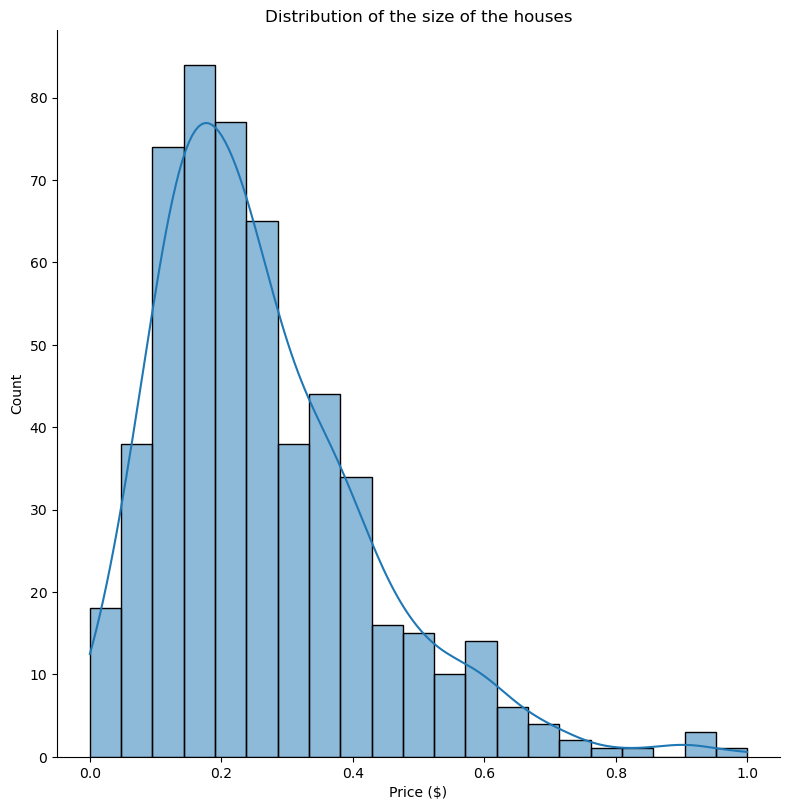

In [23]:
df_scaled
sns.displot(x='Price ($)', kde=True, height=8, data=df_scaled)
plt.title('Distribution of the size of the houses')
plt.show()

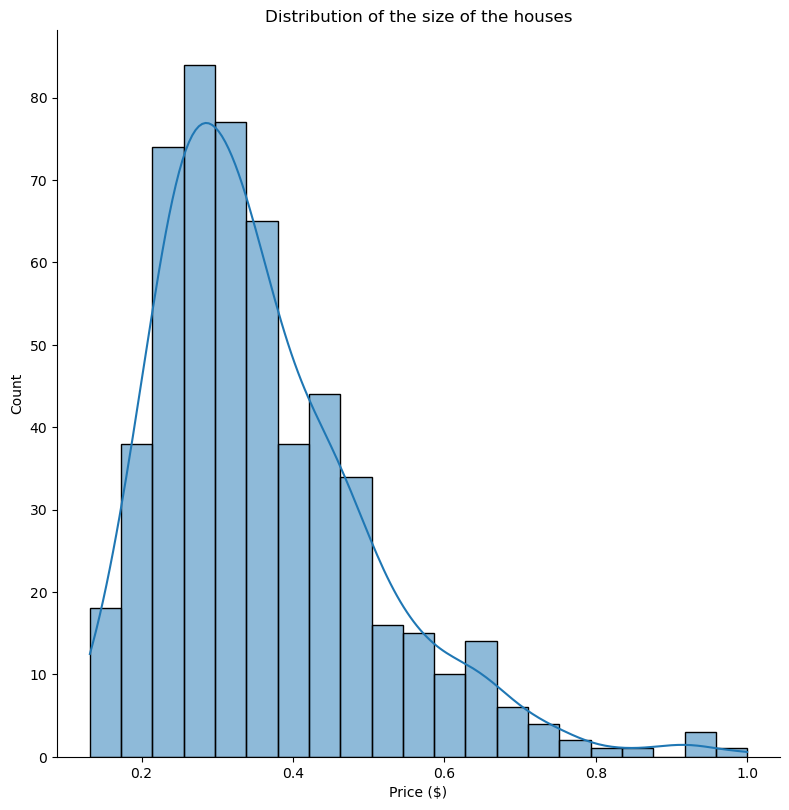

In [22]:
df_scaled
sns.displot(x='Price ($)', kde=True, height=8, data=df_scaled2)
plt.title('Distribution of the size of the houses')
plt.show()

In [54]:
X = df[['City', 'House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets', 'Stories','Renovation Status' ]]  # Add more columns as needed
y = df['Price ($)']

X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()

# r_squared = result.rsquared

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
# VIF = 1 / (1 - R^2)
vif["VIF"] = 1 / (1 - result.rsquared_adj)

print(vif)

            Variable       VIF
0              const  2.241153
1               City  2.241153
2   House Area (sqm)  2.241153
3    No. of Bedrooms  2.241153
4     No. of Toilets  2.241153
5            Stories  2.241153
6  Renovation Status  2.241153


In [55]:
import numpy as np
import pandas as pd
from numpy.linalg import eigvals

# Assuming you have a dataframe `df` containing your independent variables

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Calculate the eigenvalues of the correlation matrix
eigenvalues = eigvals(correlation_matrix)

# Calculate the condition number
condition_number = np.max(eigenvalues) / np.min(eigenvalues)

# Print the eigenvalues and condition number
print("Eigenvalues:")
print(eigenvalues)
print("Condition Number:", condition_number)

Eigenvalues:
[3.2643071  0.06733685 1.14726019 0.40093223 0.99512435 0.86129284
 0.6053039  0.65844254]
Condition Number: 48.477274354089054


In [74]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop(['Price ($)'], axis=1)  # Features
y = df[['Price ($)']]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = X_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Verify the shape of the training and testing sets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)



X_train shape: (436, 7)
X_test shape: (109, 7)
y_train shape: (436, 1)
y_test shape: (109, 1)


In [75]:
y_train

,Price ($)
0,752500
1,630000
2,392000
3,343000
4,301000
...,...
431,675500
432,616000
433,434000
434,329000


**<h2>Model Selection</h2>**

<h1>References</h1>